In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
from Experiments.foong import Setup
setup=Setup(device, layerwidth=50)

# Target density #

In [4]:
logprior=setup.logprior
loglikelihood=setup.loglikelihood
projection=setup.projection

n_data_samples=setup.n_samples
param_count=setup.param_count
model=setup._model
print(n_data_samples)

200


# Generative Network #

In [5]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=10
GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

In [6]:
%matplotlib inline
from tempfile import TemporaryDirectory


k_MC=200

#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    #Z=GeN(200).detach()
    #fig=setup.makePlot(Z,device)
    #plt.show()
    return
    
#lr =.03 for lat_dim 5

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
		                                    0, 100, 1000, 50, 50,
		                                    20000, .05, .000001, 100, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch,scores)

Epoch [0/20000], Loss: 85514.984375, Entropy -369.7100830078125, Learning Rate: 0.05
Epoch [1/20000], Loss: 841261.0625, Entropy -292.69781494140625, Learning Rate: 0.05
Epoch [2/20000], Loss: 172658.796875, Entropy -312.33526611328125, Learning Rate: 0.05
Epoch [3/20000], Loss: 185333.90625, Entropy -340.55194091796875, Learning Rate: 0.05
Epoch [4/20000], Loss: 107241.3125, Entropy -318.150634765625, Learning Rate: 0.05
Epoch [5/20000], Loss: 165327.25, Entropy -331.7514343261719, Learning Rate: 0.05
Epoch [6/20000], Loss: 104656.890625, Entropy -319.3344421386719, Learning Rate: 0.05
Epoch [7/20000], Loss: 69832.6328125, Entropy -362.6208801269531, Learning Rate: 0.05
Epoch [8/20000], Loss: 115429.7265625, Entropy -337.47442626953125, Learning Rate: 0.05
Epoch [9/20000], Loss: 94489.546875, Entropy -331.9835205078125, Learning Rate: 0.05
Epoch [10/20000], Loss: 96205.5859375, Entropy -312.2034912109375, Learning Rate: 0.05
Epoch [11/20000], Loss: 104614.0703125, Entropy -343.7158813

Epoch [97/20000], Loss: 2707.83251953125, Entropy -664.4271850585938, Learning Rate: 0.05
Epoch [98/20000], Loss: 3131.18115234375, Entropy -658.7227172851562, Learning Rate: 0.05
Epoch [99/20000], Loss: 3672.07275390625, Entropy -658.0045776367188, Learning Rate: 0.05
Epoch [100/20000], Loss: 2465.47216796875, Entropy -670.15087890625, Learning Rate: 0.05
Epoch [101/20000], Loss: 2573.1396484375, Entropy -670.8572998046875, Learning Rate: 0.05
Epoch [102/20000], Loss: 2382.45947265625, Entropy -695.88037109375, Learning Rate: 0.05
Epoch [103/20000], Loss: 2697.568115234375, Entropy -676.0982666015625, Learning Rate: 0.05
Epoch [104/20000], Loss: 2945.68408203125, Entropy -662.1534423828125, Learning Rate: 0.05
Epoch [105/20000], Loss: 2882.7158203125, Entropy -667.8017578125, Learning Rate: 0.05
Epoch [106/20000], Loss: 2581.55029296875, Entropy -668.2271118164062, Learning Rate: 0.05
Epoch [107/20000], Loss: 2415.67822265625, Entropy -696.04638671875, Learning Rate: 0.05
Epoch [108/2

Epoch [191/20000], Loss: 1223.8671875, Entropy -680.579345703125, Learning Rate: 0.05
Epoch [192/20000], Loss: 1210.4822998046875, Entropy -664.0689086914062, Learning Rate: 0.05
Epoch [193/20000], Loss: 1194.95068359375, Entropy -662.7930297851562, Learning Rate: 0.05
Epoch [194/20000], Loss: 1212.980712890625, Entropy -680.0533447265625, Learning Rate: 0.05
Epoch [195/20000], Loss: 1215.2520751953125, Entropy -674.65087890625, Learning Rate: 0.05
Epoch [196/20000], Loss: 1129.398193359375, Entropy -677.3185424804688, Learning Rate: 0.05
Epoch [197/20000], Loss: 1206.550048828125, Entropy -664.322265625, Learning Rate: 0.05
Epoch [198/20000], Loss: 1212.8558349609375, Entropy -680.9649658203125, Learning Rate: 0.05
Epoch [199/20000], Loss: 1192.7640380859375, Entropy -670.666015625, Learning Rate: 0.05
Epoch [200/20000], Loss: 1284.2958984375, Entropy -658.9891357421875, Learning Rate: 0.05
Epoch [201/20000], Loss: 1146.2833251953125, Entropy -669.0416259765625, Learning Rate: 0.05
Ep

Epoch [282/20000], Loss: 1122.60498046875, Entropy -653.2858276367188, Learning Rate: 0.05
Epoch [283/20000], Loss: 1147.662109375, Entropy -645.7453002929688, Learning Rate: 0.05
Epoch [284/20000], Loss: 1043.44775390625, Entropy -653.9859619140625, Learning Rate: 0.05
Epoch [285/20000], Loss: 1070.3055419921875, Entropy -646.826904296875, Learning Rate: 0.05
Epoch [286/20000], Loss: 1034.790771484375, Entropy -638.3572387695312, Learning Rate: 0.05
Epoch [287/20000], Loss: 1115.44580078125, Entropy -643.0001831054688, Learning Rate: 0.05
Epoch [288/20000], Loss: 1092.8436279296875, Entropy -649.9864501953125, Learning Rate: 0.05
Epoch [289/20000], Loss: 1206.5947265625, Entropy -642.6759033203125, Learning Rate: 0.05
Epoch [290/20000], Loss: 1105.23388671875, Entropy -656.2970581054688, Learning Rate: 0.05
Epoch [291/20000], Loss: 1215.0406494140625, Entropy -648.7464599609375, Learning Rate: 0.05
Epoch [292/20000], Loss: 1029.12158203125, Entropy -649.6571655273438, Learning Rate: 0

Epoch [372/20000], Loss: 1189.88427734375, Entropy -650.72705078125, Learning Rate: 0.05
Epoch [373/20000], Loss: 1017.6375122070312, Entropy -639.0712890625, Learning Rate: 0.05
Epoch [374/20000], Loss: 980.828369140625, Entropy -643.1722412109375, Learning Rate: 0.05
Epoch [375/20000], Loss: 1023.9752807617188, Entropy -650.4906005859375, Learning Rate: 0.05
Epoch [376/20000], Loss: 992.9290161132812, Entropy -639.249267578125, Learning Rate: 0.05
Epoch [377/20000], Loss: 1036.126220703125, Entropy -648.777099609375, Learning Rate: 0.05
Epoch [378/20000], Loss: 1021.5692749023438, Entropy -639.2091064453125, Learning Rate: 0.05
Epoch [379/20000], Loss: 939.5604248046875, Entropy -629.4976806640625, Learning Rate: 0.05
Epoch [380/20000], Loss: 988.6957397460938, Entropy -649.206298828125, Learning Rate: 0.05
Epoch [381/20000], Loss: 1021.0100708007812, Entropy -663.3134155273438, Learning Rate: 0.05
Epoch [382/20000], Loss: 974.1719970703125, Entropy -650.2024536132812, Learning Rate:

Epoch [466/20000], Loss: 970.2805786132812, Entropy -635.730224609375, Learning Rate: 0.025
Epoch [467/20000], Loss: 880.6124877929688, Entropy -601.5137939453125, Learning Rate: 0.025
Epoch [468/20000], Loss: 928.70068359375, Entropy -643.515869140625, Learning Rate: 0.025
Epoch [469/20000], Loss: 908.5155639648438, Entropy -643.8715209960938, Learning Rate: 0.025
Epoch [470/20000], Loss: 922.645263671875, Entropy -649.9656372070312, Learning Rate: 0.025
Epoch [471/20000], Loss: 926.6649780273438, Entropy -646.857666015625, Learning Rate: 0.025
Epoch [472/20000], Loss: 905.5877075195312, Entropy -630.0064086914062, Learning Rate: 0.025
Epoch [473/20000], Loss: 896.9744262695312, Entropy -643.4158325195312, Learning Rate: 0.025
Epoch [474/20000], Loss: 888.64208984375, Entropy -632.6854248046875, Learning Rate: 0.025
Epoch [475/20000], Loss: 879.5672607421875, Entropy -626.82763671875, Learning Rate: 0.025
Epoch [476/20000], Loss: 893.0722045898438, Entropy -625.2318725585938, Learning

Epoch [559/20000], Loss: 918.8614501953125, Entropy -619.9102783203125, Learning Rate: 0.025
Epoch [560/20000], Loss: 867.0537109375, Entropy -622.248779296875, Learning Rate: 0.025
Epoch [561/20000], Loss: 870.7639770507812, Entropy -630.8809814453125, Learning Rate: 0.025
Epoch [562/20000], Loss: 839.3795166015625, Entropy -595.020263671875, Learning Rate: 0.025
Epoch [563/20000], Loss: 890.63818359375, Entropy -626.3421020507812, Learning Rate: 0.025
Epoch [564/20000], Loss: 884.1104736328125, Entropy -642.8135986328125, Learning Rate: 0.025
Epoch [565/20000], Loss: 848.3388061523438, Entropy -619.6113891601562, Learning Rate: 0.025
Epoch [566/20000], Loss: 882.2625732421875, Entropy -623.83203125, Learning Rate: 0.025
Epoch [567/20000], Loss: 858.2948608398438, Entropy -612.3029174804688, Learning Rate: 0.025
Epoch [568/20000], Loss: 861.1693725585938, Entropy -614.21337890625, Learning Rate: 0.025
Epoch [569/20000], Loss: 856.7506103515625, Entropy -612.734619140625, Learning Rate

Epoch [649/20000], Loss: 810.180419921875, Entropy -603.7877197265625, Learning Rate: 0.025
Epoch [650/20000], Loss: 784.9221801757812, Entropy -596.3776245117188, Learning Rate: 0.025
Epoch [651/20000], Loss: 818.2252197265625, Entropy -584.18994140625, Learning Rate: 0.025
Epoch [652/20000], Loss: 796.7614135742188, Entropy -587.6463623046875, Learning Rate: 0.025
Epoch [653/20000], Loss: 811.385498046875, Entropy -593.507080078125, Learning Rate: 0.025
Epoch [654/20000], Loss: 802.8959350585938, Entropy -579.0506591796875, Learning Rate: 0.025
Epoch [655/20000], Loss: 818.1876831054688, Entropy -589.01708984375, Learning Rate: 0.025
Epoch [656/20000], Loss: 768.5260009765625, Entropy -586.2549438476562, Learning Rate: 0.025
Epoch [657/20000], Loss: 806.4053344726562, Entropy -589.1961669921875, Learning Rate: 0.025
Epoch [658/20000], Loss: 829.279541015625, Entropy -595.2721557617188, Learning Rate: 0.025
Epoch [659/20000], Loss: 806.410400390625, Entropy -586.2070922851562, Learnin

Epoch [741/20000], Loss: 769.9932861328125, Entropy -590.304931640625, Learning Rate: 0.025
Epoch [742/20000], Loss: 795.2640380859375, Entropy -573.1338500976562, Learning Rate: 0.025
Epoch [743/20000], Loss: 785.1207885742188, Entropy -599.2135009765625, Learning Rate: 0.025
Epoch [744/20000], Loss: 758.7972412109375, Entropy -558.9764404296875, Learning Rate: 0.025
Epoch [745/20000], Loss: 787.7720947265625, Entropy -573.4781494140625, Learning Rate: 0.025
Epoch [746/20000], Loss: 759.2921142578125, Entropy -586.7393188476562, Learning Rate: 0.025
Epoch [747/20000], Loss: 798.5419311523438, Entropy -572.78173828125, Learning Rate: 0.025
Epoch [748/20000], Loss: 773.578125, Entropy -557.7694091796875, Learning Rate: 0.025
Epoch [749/20000], Loss: 748.264404296875, Entropy -590.0115966796875, Learning Rate: 0.025
Epoch [750/20000], Loss: 759.3707885742188, Entropy -568.2135009765625, Learning Rate: 0.025
Epoch [751/20000], Loss: 778.8255615234375, Entropy -570.9907836914062, Learning 

Epoch [832/20000], Loss: 739.8898315429688, Entropy -589.3541870117188, Learning Rate: 0.025
Epoch [833/20000], Loss: 736.466796875, Entropy -568.61865234375, Learning Rate: 0.025
Epoch [834/20000], Loss: 756.46435546875, Entropy -563.2174072265625, Learning Rate: 0.025
Epoch [835/20000], Loss: 740.2277221679688, Entropy -567.3961181640625, Learning Rate: 0.025
Epoch [836/20000], Loss: 764.7675170898438, Entropy -583.3494262695312, Learning Rate: 0.025
Epoch [837/20000], Loss: 764.8092651367188, Entropy -546.8946533203125, Learning Rate: 0.025
Epoch [838/20000], Loss: 773.1082763671875, Entropy -572.5897827148438, Learning Rate: 0.025
Epoch [839/20000], Loss: 750.4594116210938, Entropy -576.1595458984375, Learning Rate: 0.025
Epoch [840/20000], Loss: 755.8993530273438, Entropy -559.9730834960938, Learning Rate: 0.025
Epoch [841/20000], Loss: 792.7554321289062, Entropy -563.1080932617188, Learning Rate: 0.025
Epoch [842/20000], Loss: 779.2236938476562, Entropy -600.332763671875, Learnin

Epoch [924/20000], Loss: 787.4205932617188, Entropy -550.4625854492188, Learning Rate: 0.025
Epoch [925/20000], Loss: 862.935791015625, Entropy -568.5742797851562, Learning Rate: 0.025
Epoch [926/20000], Loss: 753.317626953125, Entropy -557.1133422851562, Learning Rate: 0.025
Epoch [927/20000], Loss: 786.352783203125, Entropy -559.5181884765625, Learning Rate: 0.025
Epoch [928/20000], Loss: 995.81689453125, Entropy -573.1336669921875, Learning Rate: 0.025
Epoch [929/20000], Loss: 1097.2322998046875, Entropy -578.946533203125, Learning Rate: 0.025
Epoch [930/20000], Loss: 829.9841918945312, Entropy -556.3412475585938, Learning Rate: 0.025
Epoch [931/20000], Loss: 736.3866577148438, Entropy -567.417236328125, Learning Rate: 0.025
Epoch [932/20000], Loss: 953.9842529296875, Entropy -572.4922485351562, Learning Rate: 0.025
Epoch [933/20000], Loss: 1021.1099853515625, Entropy -541.6870727539062, Learning Rate: 0.025
Epoch [934/20000], Loss: 838.835693359375, Entropy -548.52392578125, Learni

Epoch [1013/20000], Loss: 761.0093994140625, Entropy -603.5323486328125, Learning Rate: 0.0125
Epoch [1014/20000], Loss: 759.3649291992188, Entropy -583.63916015625, Learning Rate: 0.0125
Epoch [1015/20000], Loss: 740.791259765625, Entropy -589.774658203125, Learning Rate: 0.0125
Epoch [1016/20000], Loss: 762.8919067382812, Entropy -588.4427490234375, Learning Rate: 0.0125
Epoch [1017/20000], Loss: 767.6133422851562, Entropy -581.4027099609375, Learning Rate: 0.0125
Epoch [1018/20000], Loss: 774.5690307617188, Entropy -602.200927734375, Learning Rate: 0.0125
Epoch [1019/20000], Loss: 762.6397705078125, Entropy -601.036865234375, Learning Rate: 0.0125
Epoch [1020/20000], Loss: 742.6161499023438, Entropy -591.941162109375, Learning Rate: 0.0125
Epoch [1021/20000], Loss: 747.0885620117188, Entropy -596.6710815429688, Learning Rate: 0.0125
Epoch [1022/20000], Loss: 719.9151611328125, Entropy -582.49462890625, Learning Rate: 0.0125
Epoch [1023/20000], Loss: 763.1021118164062, Entropy -607.5

Epoch [1103/20000], Loss: 685.172607421875, Entropy -566.93310546875, Learning Rate: 0.0125
Epoch [1104/20000], Loss: 706.150146484375, Entropy -568.0045776367188, Learning Rate: 0.0125
Epoch [1105/20000], Loss: 713.8656616210938, Entropy -585.917724609375, Learning Rate: 0.0125
Epoch [1106/20000], Loss: 707.3584594726562, Entropy -579.7257080078125, Learning Rate: 0.0125
Epoch [1107/20000], Loss: 690.7490844726562, Entropy -572.469970703125, Learning Rate: 0.0125
Epoch [1108/20000], Loss: 686.376220703125, Entropy -559.617431640625, Learning Rate: 0.0125
Epoch [1109/20000], Loss: 687.649658203125, Entropy -552.0755615234375, Learning Rate: 0.0125
Epoch [1110/20000], Loss: 765.8495483398438, Entropy -567.723388671875, Learning Rate: 0.0125
Epoch [1111/20000], Loss: 687.8261108398438, Entropy -556.877685546875, Learning Rate: 0.0125
Epoch [1112/20000], Loss: 716.131591796875, Entropy -591.228271484375, Learning Rate: 0.0125
Epoch [1113/20000], Loss: 693.4888916015625, Entropy -560.98394

Epoch [1191/20000], Loss: 678.2763061523438, Entropy -557.5665893554688, Learning Rate: 0.0125
Epoch [1192/20000], Loss: 679.0631713867188, Entropy -567.375244140625, Learning Rate: 0.0125
Epoch [1193/20000], Loss: 675.4013061523438, Entropy -558.42578125, Learning Rate: 0.0125
Epoch [1194/20000], Loss: 651.9092407226562, Entropy -538.6436767578125, Learning Rate: 0.0125
Epoch [1195/20000], Loss: 684.8185424804688, Entropy -558.4624633789062, Learning Rate: 0.0125
Epoch [1196/20000], Loss: 667.920166015625, Entropy -555.8269653320312, Learning Rate: 0.0125
Epoch [1197/20000], Loss: 664.7124633789062, Entropy -555.4366455078125, Learning Rate: 0.0125
Epoch [1198/20000], Loss: 648.1207275390625, Entropy -535.3717041015625, Learning Rate: 0.0125
Epoch [1199/20000], Loss: 650.2626342773438, Entropy -532.4885864257812, Learning Rate: 0.0125
Epoch [1200/20000], Loss: 653.0253295898438, Entropy -536.4006958007812, Learning Rate: 0.0125
Epoch [1201/20000], Loss: 647.846923828125, Entropy -530.

Epoch [1281/20000], Loss: 645.2578735351562, Entropy -524.1752319335938, Learning Rate: 0.0125
Epoch [1282/20000], Loss: 649.4246215820312, Entropy -533.3230590820312, Learning Rate: 0.0125
Epoch [1283/20000], Loss: 652.1134033203125, Entropy -536.10205078125, Learning Rate: 0.0125
Epoch [1284/20000], Loss: 718.2144165039062, Entropy -544.9901123046875, Learning Rate: 0.0125
Epoch [1285/20000], Loss: 689.6380004882812, Entropy -559.5023193359375, Learning Rate: 0.0125
Epoch [1286/20000], Loss: 652.28857421875, Entropy -543.281494140625, Learning Rate: 0.0125
Epoch [1287/20000], Loss: 655.4957885742188, Entropy -535.6965942382812, Learning Rate: 0.0125
Epoch [1288/20000], Loss: 659.10400390625, Entropy -531.557861328125, Learning Rate: 0.0125
Epoch [1289/20000], Loss: 645.4909057617188, Entropy -533.4508056640625, Learning Rate: 0.0125
Epoch [1290/20000], Loss: 653.9497680664062, Entropy -537.08056640625, Learning Rate: 0.0125
Epoch [1291/20000], Loss: 643.1478271484375, Entropy -531.28

Epoch [1370/20000], Loss: 651.7362670898438, Entropy -539.653076171875, Learning Rate: 0.0125
Epoch [1371/20000], Loss: 639.2506103515625, Entropy -521.263671875, Learning Rate: 0.0125
Epoch [1372/20000], Loss: 640.58935546875, Entropy -516.3271484375, Learning Rate: 0.0125
Epoch [1373/20000], Loss: 667.9519653320312, Entropy -544.3834228515625, Learning Rate: 0.0125
Epoch [1374/20000], Loss: 662.5790405273438, Entropy -552.4664306640625, Learning Rate: 0.0125
Epoch [1375/20000], Loss: 673.3611450195312, Entropy -535.7734985351562, Learning Rate: 0.0125
Epoch [1376/20000], Loss: 638.7882080078125, Entropy -520.4003295898438, Learning Rate: 0.0125
Epoch [1377/20000], Loss: 688.6663208007812, Entropy -528.9949951171875, Learning Rate: 0.0125
Epoch [1378/20000], Loss: 646.6817016601562, Entropy -526.3896484375, Learning Rate: 0.0125
Epoch [1379/20000], Loss: 658.0742797851562, Entropy -529.97509765625, Learning Rate: 0.0125
Epoch [1380/20000], Loss: 652.1342163085938, Entropy -527.8551025

Epoch [1461/20000], Loss: 651.1551513671875, Entropy -537.5559692382812, Learning Rate: 0.0125
Epoch [1462/20000], Loss: 676.227783203125, Entropy -549.718994140625, Learning Rate: 0.0125
Epoch [1463/20000], Loss: 636.33203125, Entropy -522.6488037109375, Learning Rate: 0.0125
Epoch [1464/20000], Loss: 653.3530883789062, Entropy -511.46966552734375, Learning Rate: 0.0125
Epoch [1465/20000], Loss: 653.7228393554688, Entropy -517.2703247070312, Learning Rate: 0.0125
Epoch [1466/20000], Loss: 633.8848876953125, Entropy -521.4071044921875, Learning Rate: 0.0125
Epoch [1467/20000], Loss: 645.3494873046875, Entropy -520.4024658203125, Learning Rate: 0.0125
Epoch [1468/20000], Loss: 620.0322265625, Entropy -500.0926208496094, Learning Rate: 0.0125
Epoch [1469/20000], Loss: 645.8645629882812, Entropy -519.8429565429688, Learning Rate: 0.0125
Epoch [1470/20000], Loss: 636.1964111328125, Entropy -517.7422485351562, Learning Rate: 0.0125
Epoch [1471/20000], Loss: 633.1090087890625, Entropy -521.6

Epoch [1550/20000], Loss: 617.7460327148438, Entropy -497.633544921875, Learning Rate: 0.0125
Epoch [1551/20000], Loss: 656.232177734375, Entropy -535.2235107421875, Learning Rate: 0.0125
Epoch [1552/20000], Loss: 637.348388671875, Entropy -503.86181640625, Learning Rate: 0.0125
Epoch [1553/20000], Loss: 614.1669921875, Entropy -507.0655517578125, Learning Rate: 0.0125
Epoch [1554/20000], Loss: 669.4287109375, Entropy -511.44384765625, Learning Rate: 0.0125
Epoch [1555/20000], Loss: 628.0386962890625, Entropy -493.956787109375, Learning Rate: 0.0125
Epoch [1556/20000], Loss: 627.30224609375, Entropy -503.2073974609375, Learning Rate: 0.0125
Epoch [1557/20000], Loss: 656.7916870117188, Entropy -532.02587890625, Learning Rate: 0.0125
Epoch [1558/20000], Loss: 633.6116943359375, Entropy -503.73626708984375, Learning Rate: 0.0125
Epoch [1559/20000], Loss: 653.5537109375, Entropy -534.88525390625, Learning Rate: 0.0125
Epoch [1560/20000], Loss: 695.579345703125, Entropy -517.6533813476562, 

Epoch [1640/20000], Loss: 613.868408203125, Entropy -486.08245849609375, Learning Rate: 0.0125
Epoch [1641/20000], Loss: 661.1765747070312, Entropy -524.1134033203125, Learning Rate: 0.0125
Epoch [1642/20000], Loss: 649.771484375, Entropy -515.4078369140625, Learning Rate: 0.0125
Epoch [1643/20000], Loss: 624.0277709960938, Entropy -495.48046875, Learning Rate: 0.0125
Epoch [1644/20000], Loss: 621.267333984375, Entropy -497.7792663574219, Learning Rate: 0.0125
Epoch [1645/20000], Loss: 626.1472778320312, Entropy -504.3415222167969, Learning Rate: 0.0125
Epoch [1646/20000], Loss: 624.952880859375, Entropy -497.03802490234375, Learning Rate: 0.0125
Epoch [1647/20000], Loss: 643.1739501953125, Entropy -506.997802734375, Learning Rate: 0.0125
Epoch [1648/20000], Loss: 637.3779907226562, Entropy -517.658447265625, Learning Rate: 0.0125
Epoch [1649/20000], Loss: 657.8844604492188, Entropy -501.6224365234375, Learning Rate: 0.0125
Epoch [1650/20000], Loss: 636.9610595703125, Entropy -519.1771

Epoch [1731/20000], Loss: 614.4827270507812, Entropy -513.5467529296875, Learning Rate: 0.00625
Epoch [1732/20000], Loss: 619.0569458007812, Entropy -509.1435546875, Learning Rate: 0.00625
Epoch [1733/20000], Loss: 619.1218872070312, Entropy -504.53839111328125, Learning Rate: 0.00625
Epoch [1734/20000], Loss: 599.482177734375, Entropy -495.74310302734375, Learning Rate: 0.00625
Epoch [1735/20000], Loss: 610.7009887695312, Entropy -498.01666259765625, Learning Rate: 0.00625
Epoch [1736/20000], Loss: 594.7669677734375, Entropy -489.3381042480469, Learning Rate: 0.00625
Epoch [1737/20000], Loss: 604.0843505859375, Entropy -491.3780212402344, Learning Rate: 0.00625
Epoch [1738/20000], Loss: 608.7401733398438, Entropy -504.1002197265625, Learning Rate: 0.00625
Epoch [1739/20000], Loss: 613.9951171875, Entropy -497.24395751953125, Learning Rate: 0.00625
Epoch [1740/20000], Loss: 626.085205078125, Entropy -515.9542236328125, Learning Rate: 0.00625
Epoch [1741/20000], Loss: 621.5325927734375,

Epoch [1817/20000], Loss: 603.0432739257812, Entropy -498.7829895019531, Learning Rate: 0.003125
Epoch [1818/20000], Loss: 605.029296875, Entropy -493.8631896972656, Learning Rate: 0.003125
Epoch [1819/20000], Loss: 604.2030029296875, Entropy -500.7176513671875, Learning Rate: 0.003125
Epoch [1820/20000], Loss: 604.7716064453125, Entropy -499.7668762207031, Learning Rate: 0.003125
Epoch [1821/20000], Loss: 603.2835693359375, Entropy -504.49212646484375, Learning Rate: 0.003125
Epoch [1822/20000], Loss: 586.5860595703125, Entropy -476.1278076171875, Learning Rate: 0.003125
Epoch [1823/20000], Loss: 636.3912963867188, Entropy -526.1051025390625, Learning Rate: 0.003125
Epoch [1824/20000], Loss: 617.1707763671875, Entropy -506.1015930175781, Learning Rate: 0.003125
Epoch [1825/20000], Loss: 628.5675659179688, Entropy -502.12884521484375, Learning Rate: 0.003125
Epoch [1826/20000], Loss: 597.0032348632812, Entropy -500.6761779785156, Learning Rate: 0.003125
Epoch [1827/20000], Loss: 600.92

Epoch [1904/20000], Loss: 598.6199951171875, Entropy -506.73199462890625, Learning Rate: 0.003125
Epoch [1905/20000], Loss: 593.9019775390625, Entropy -483.3630676269531, Learning Rate: 0.003125
Epoch [1906/20000], Loss: 601.8731079101562, Entropy -498.16973876953125, Learning Rate: 0.003125
Epoch [1907/20000], Loss: 603.8291625976562, Entropy -499.35784912109375, Learning Rate: 0.003125
Epoch [1908/20000], Loss: 608.0104370117188, Entropy -501.49090576171875, Learning Rate: 0.003125
Epoch [1909/20000], Loss: 603.2958984375, Entropy -496.7147521972656, Learning Rate: 0.003125
Epoch [1910/20000], Loss: 631.4671020507812, Entropy -519.3358154296875, Learning Rate: 0.003125
Epoch [1911/20000], Loss: 610.7197875976562, Entropy -500.0961608886719, Learning Rate: 0.003125
Epoch [1912/20000], Loss: 617.539794921875, Entropy -512.8781127929688, Learning Rate: 0.003125
Epoch [1913/20000], Loss: 601.3170776367188, Entropy -494.82440185546875, Learning Rate: 0.003125
Epoch [1914/20000], Loss: 593

Epoch [1992/20000], Loss: 600.5260620117188, Entropy -501.256591796875, Learning Rate: 0.003125
Epoch [1993/20000], Loss: 609.280517578125, Entropy -507.27691650390625, Learning Rate: 0.003125
Epoch [1994/20000], Loss: 596.9911499023438, Entropy -496.918212890625, Learning Rate: 0.003125
Epoch [1995/20000], Loss: 601.67578125, Entropy -501.5509033203125, Learning Rate: 0.003125
Epoch [1996/20000], Loss: 596.9148559570312, Entropy -486.59844970703125, Learning Rate: 0.003125
Epoch [1997/20000], Loss: 602.231201171875, Entropy -500.11358642578125, Learning Rate: 0.003125
Epoch [1998/20000], Loss: 613.6505126953125, Entropy -517.199951171875, Learning Rate: 0.003125
Epoch [1999/20000], Loss: 609.1078491210938, Entropy -507.0863037109375, Learning Rate: 0.003125
Epoch [2000/20000], Loss: 589.8876953125, Entropy -478.1832580566406, Learning Rate: 0.003125
Epoch [2001/20000], Loss: 590.4262084960938, Entropy -484.4249267578125, Learning Rate: 0.0015625
Epoch [2002/20000], Loss: 593.367248535

Epoch [2078/20000], Loss: 595.9552612304688, Entropy -489.9543151855469, Learning Rate: 0.0015625
Epoch [2079/20000], Loss: 600.33984375, Entropy -497.91253662109375, Learning Rate: 0.0015625
Epoch [2080/20000], Loss: 592.826904296875, Entropy -497.02142333984375, Learning Rate: 0.0015625
Epoch [2081/20000], Loss: 575.7904052734375, Entropy -476.951904296875, Learning Rate: 0.0015625
Epoch [2082/20000], Loss: 598.4144287109375, Entropy -502.23016357421875, Learning Rate: 0.0015625
Epoch [2083/20000], Loss: 590.174072265625, Entropy -478.1948547363281, Learning Rate: 0.0015625
Epoch [2084/20000], Loss: 618.0174560546875, Entropy -497.3076171875, Learning Rate: 0.0015625
Epoch [2085/20000], Loss: 601.7408447265625, Entropy -472.148193359375, Learning Rate: 0.0015625
Epoch [2086/20000], Loss: 602.2686157226562, Entropy -480.4417419433594, Learning Rate: 0.0015625
Epoch [2087/20000], Loss: 592.663330078125, Entropy -489.38946533203125, Learning Rate: 0.0015625
Epoch [2088/20000], Loss: 615

Epoch [2162/20000], Loss: 600.5427856445312, Entropy -495.092041015625, Learning Rate: 0.0015625
Epoch [2163/20000], Loss: 612.09814453125, Entropy -485.490234375, Learning Rate: 0.0015625
Epoch [2164/20000], Loss: 591.8444213867188, Entropy -481.3197937011719, Learning Rate: 0.0015625
Epoch [2165/20000], Loss: 590.8215942382812, Entropy -490.53985595703125, Learning Rate: 0.0015625
Epoch [2166/20000], Loss: 598.096435546875, Entropy -496.3322448730469, Learning Rate: 0.0015625
Epoch [2167/20000], Loss: 608.6705932617188, Entropy -505.69744873046875, Learning Rate: 0.0015625
Epoch [2168/20000], Loss: 607.62841796875, Entropy -493.69915771484375, Learning Rate: 0.0015625
Epoch [2169/20000], Loss: 597.4393310546875, Entropy -493.7464904785156, Learning Rate: 0.0015625
Epoch [2170/20000], Loss: 587.978759765625, Entropy -484.44989013671875, Learning Rate: 0.0015625
Epoch [2171/20000], Loss: 603.7442626953125, Entropy -509.70751953125, Learning Rate: 0.0015625
Epoch [2172/20000], Loss: 602

Epoch [2248/20000], Loss: 585.5828857421875, Entropy -470.57025146484375, Learning Rate: 0.00078125
Epoch [2249/20000], Loss: 586.5092163085938, Entropy -474.44415283203125, Learning Rate: 0.00078125
Epoch [2250/20000], Loss: 600.4814453125, Entropy -491.7349853515625, Learning Rate: 0.00078125
Epoch [2251/20000], Loss: 600.1973876953125, Entropy -500.3919372558594, Learning Rate: 0.00078125
Epoch [2252/20000], Loss: 587.6826782226562, Entropy -478.94281005859375, Learning Rate: 0.00078125
Epoch [2253/20000], Loss: 587.9141845703125, Entropy -492.1141662597656, Learning Rate: 0.00078125
Epoch [2254/20000], Loss: 607.294921875, Entropy -507.65008544921875, Learning Rate: 0.00078125
Epoch [2255/20000], Loss: 578.4921875, Entropy -479.311279296875, Learning Rate: 0.00078125
Epoch [2256/20000], Loss: 599.0070190429688, Entropy -486.40887451171875, Learning Rate: 0.00078125
Epoch [2257/20000], Loss: 600.804443359375, Entropy -502.3494873046875, Learning Rate: 0.00078125
Epoch [2258/20000], 

Epoch [2335/20000], Loss: 591.8341674804688, Entropy -482.2544860839844, Learning Rate: 0.00078125
Epoch [2336/20000], Loss: 594.566650390625, Entropy -487.01690673828125, Learning Rate: 0.00078125
Epoch [2337/20000], Loss: 598.9818115234375, Entropy -470.90960693359375, Learning Rate: 0.00078125
Epoch [2338/20000], Loss: 604.01904296875, Entropy -506.56707763671875, Learning Rate: 0.00078125
Epoch [2339/20000], Loss: 592.3546142578125, Entropy -489.681884765625, Learning Rate: 0.00078125
Epoch [2340/20000], Loss: 605.7119750976562, Entropy -490.12261962890625, Learning Rate: 0.00078125
Epoch [2341/20000], Loss: 603.350830078125, Entropy -499.56097412109375, Learning Rate: 0.00078125
Epoch [2342/20000], Loss: 589.380615234375, Entropy -479.44720458984375, Learning Rate: 0.00078125
Epoch [2343/20000], Loss: 592.9451293945312, Entropy -486.6318359375, Learning Rate: 0.00078125
Epoch [2344/20000], Loss: 608.86474609375, Entropy -506.46392822265625, Learning Rate: 0.00078125
Epoch [2345/20

Epoch [2419/20000], Loss: 580.0821533203125, Entropy -478.96734619140625, Learning Rate: 0.000390625
Epoch [2420/20000], Loss: 596.2705688476562, Entropy -491.3195495605469, Learning Rate: 0.000390625
Epoch [2421/20000], Loss: 594.303466796875, Entropy -488.794677734375, Learning Rate: 0.000390625
Epoch [2422/20000], Loss: 585.5006713867188, Entropy -482.27081298828125, Learning Rate: 0.000390625
Epoch [2423/20000], Loss: 619.1827392578125, Entropy -514.8970947265625, Learning Rate: 0.000390625
Epoch [2424/20000], Loss: 573.7110595703125, Entropy -475.259765625, Learning Rate: 0.000390625
Epoch [2425/20000], Loss: 601.085693359375, Entropy -488.640625, Learning Rate: 0.000390625
Epoch [2426/20000], Loss: 577.531982421875, Entropy -477.4062805175781, Learning Rate: 0.000390625
Epoch [2427/20000], Loss: 586.07373046875, Entropy -473.3031311035156, Learning Rate: 0.000390625
Epoch [2428/20000], Loss: 593.592041015625, Entropy -490.57110595703125, Learning Rate: 0.000390625
Epoch [2429/200

Epoch [2503/20000], Loss: 604.5516357421875, Entropy -495.1950378417969, Learning Rate: 0.000390625
Epoch [2504/20000], Loss: 595.5324096679688, Entropy -473.82708740234375, Learning Rate: 0.000390625
Epoch [2505/20000], Loss: 600.351806640625, Entropy -501.1659851074219, Learning Rate: 0.000390625
Epoch [2506/20000], Loss: 600.6574096679688, Entropy -496.7757568359375, Learning Rate: 0.000390625
Epoch [2507/20000], Loss: 599.8892822265625, Entropy -495.45465087890625, Learning Rate: 0.0001953125
Epoch [2508/20000], Loss: 596.318603515625, Entropy -492.6513366699219, Learning Rate: 0.0001953125
Epoch [2509/20000], Loss: 579.647216796875, Entropy -474.0322570800781, Learning Rate: 0.0001953125
Epoch [2510/20000], Loss: 577.1505126953125, Entropy -475.249267578125, Learning Rate: 0.0001953125
Epoch [2511/20000], Loss: 603.0162353515625, Entropy -500.92401123046875, Learning Rate: 0.0001953125
Epoch [2512/20000], Loss: 608.6940307617188, Entropy -494.5877685546875, Learning Rate: 0.000195

Epoch [2585/20000], Loss: 597.7892456054688, Entropy -488.8132019042969, Learning Rate: 0.0001953125
Epoch [2586/20000], Loss: 591.0517578125, Entropy -489.24261474609375, Learning Rate: 0.0001953125
Epoch [2587/20000], Loss: 579.5443115234375, Entropy -486.89349365234375, Learning Rate: 0.0001953125
Epoch [2588/20000], Loss: 598.4183959960938, Entropy -495.59625244140625, Learning Rate: 0.0001953125
Epoch [2589/20000], Loss: 581.9385375976562, Entropy -473.89617919921875, Learning Rate: 0.0001953125
Epoch [2590/20000], Loss: 588.7769165039062, Entropy -480.5870056152344, Learning Rate: 0.0001953125
Epoch [2591/20000], Loss: 596.879638671875, Entropy -491.9566650390625, Learning Rate: 0.0001953125
Epoch [2592/20000], Loss: 593.2594604492188, Entropy -473.69580078125, Learning Rate: 0.0001953125
Epoch [2593/20000], Loss: 617.8565063476562, Entropy -502.883056640625, Learning Rate: 0.0001953125
Epoch [2594/20000], Loss: 594.4918823242188, Entropy -489.58306884765625, Learning Rate: 0.000

Epoch [2669/20000], Loss: 569.7042846679688, Entropy -473.85308837890625, Learning Rate: 9.765625e-05
Epoch [2670/20000], Loss: 589.1417236328125, Entropy -490.3517150878906, Learning Rate: 9.765625e-05
Epoch [2671/20000], Loss: 590.9493408203125, Entropy -500.06744384765625, Learning Rate: 9.765625e-05
Epoch [2672/20000], Loss: 592.26513671875, Entropy -478.29119873046875, Learning Rate: 9.765625e-05
Epoch [2673/20000], Loss: 592.6072998046875, Entropy -495.3506774902344, Learning Rate: 9.765625e-05
Epoch [2674/20000], Loss: 602.1522216796875, Entropy -497.03668212890625, Learning Rate: 9.765625e-05
Epoch [2675/20000], Loss: 581.2857055664062, Entropy -479.30133056640625, Learning Rate: 9.765625e-05
Epoch [2676/20000], Loss: 598.418212890625, Entropy -494.87554931640625, Learning Rate: 9.765625e-05
Epoch [2677/20000], Loss: 589.0357666015625, Entropy -488.442626953125, Learning Rate: 9.765625e-05
Epoch [2678/20000], Loss: 592.6245727539062, Entropy -476.53070068359375, Learning Rate: 

Epoch [2753/20000], Loss: 595.8031005859375, Entropy -493.18695068359375, Learning Rate: 9.765625e-05
Epoch [2754/20000], Loss: 603.9057006835938, Entropy -492.16778564453125, Learning Rate: 9.765625e-05
Epoch [2755/20000], Loss: 588.6478271484375, Entropy -497.76422119140625, Learning Rate: 9.765625e-05
Epoch [2756/20000], Loss: 592.2569580078125, Entropy -492.219970703125, Learning Rate: 9.765625e-05
Epoch [2757/20000], Loss: 606.1103515625, Entropy -500.70281982421875, Learning Rate: 9.765625e-05
Epoch [2758/20000], Loss: 591.7623901367188, Entropy -492.14093017578125, Learning Rate: 9.765625e-05
Epoch [2759/20000], Loss: 572.1866455078125, Entropy -456.0252685546875, Learning Rate: 9.765625e-05
Epoch [2760/20000], Loss: 591.5936279296875, Entropy -490.29888916015625, Learning Rate: 9.765625e-05
Epoch [2761/20000], Loss: 594.4791870117188, Entropy -490.2327880859375, Learning Rate: 9.765625e-05
Epoch [2762/20000], Loss: 596.7313842773438, Entropy -485.46417236328125, Learning Rate: 

Epoch [2834/20000], Loss: 592.277587890625, Entropy -491.0062561035156, Learning Rate: 4.8828125e-05
Epoch [2835/20000], Loss: 592.3685302734375, Entropy -489.22491455078125, Learning Rate: 4.8828125e-05
Epoch [2836/20000], Loss: 582.0064697265625, Entropy -480.5738525390625, Learning Rate: 4.8828125e-05
Epoch [2837/20000], Loss: 585.4887084960938, Entropy -481.75140380859375, Learning Rate: 4.8828125e-05
Epoch [2838/20000], Loss: 594.963623046875, Entropy -476.65814208984375, Learning Rate: 4.8828125e-05
Epoch [2839/20000], Loss: 596.0894775390625, Entropy -494.085693359375, Learning Rate: 4.8828125e-05
Epoch [2840/20000], Loss: 588.0484619140625, Entropy -477.5855712890625, Learning Rate: 4.8828125e-05
Epoch [2841/20000], Loss: 601.52783203125, Entropy -493.3597717285156, Learning Rate: 4.8828125e-05
Epoch [2842/20000], Loss: 599.4033203125, Entropy -501.75982666015625, Learning Rate: 4.8828125e-05
Epoch [2843/20000], Loss: 575.133056640625, Entropy -469.34844970703125, Learning Rate

Epoch [2917/20000], Loss: 580.8300170898438, Entropy -471.3840026855469, Learning Rate: 2.44140625e-05
Epoch [2918/20000], Loss: 584.1301879882812, Entropy -471.1512756347656, Learning Rate: 2.44140625e-05
Epoch [2919/20000], Loss: 592.6856689453125, Entropy -491.9746398925781, Learning Rate: 2.44140625e-05
Epoch [2920/20000], Loss: 597.7685546875, Entropy -490.0811767578125, Learning Rate: 2.44140625e-05
Epoch [2921/20000], Loss: 591.4967651367188, Entropy -478.1888122558594, Learning Rate: 2.44140625e-05
Epoch [2922/20000], Loss: 587.2245483398438, Entropy -477.246826171875, Learning Rate: 2.44140625e-05
Epoch [2923/20000], Loss: 598.2127075195312, Entropy -505.13079833984375, Learning Rate: 2.44140625e-05
Epoch [2924/20000], Loss: 581.31591796875, Entropy -474.7220458984375, Learning Rate: 2.44140625e-05
Epoch [2925/20000], Loss: 585.3972778320312, Entropy -480.8480224609375, Learning Rate: 2.44140625e-05
Epoch [2926/20000], Loss: 584.697998046875, Entropy -487.992431640625, Learnin

Epoch [3001/20000], Loss: 592.9345703125, Entropy -485.38067626953125, Learning Rate: 1.220703125e-05
Epoch [3002/20000], Loss: 598.818115234375, Entropy -486.5653076171875, Learning Rate: 1.220703125e-05
Epoch [3003/20000], Loss: 583.6514892578125, Entropy -479.06787109375, Learning Rate: 1.220703125e-05
Epoch [3004/20000], Loss: 602.1224365234375, Entropy -489.89093017578125, Learning Rate: 1.220703125e-05
Epoch [3005/20000], Loss: 601.706298828125, Entropy -489.2720642089844, Learning Rate: 1.220703125e-05
Epoch [3006/20000], Loss: 584.5424194335938, Entropy -478.8409729003906, Learning Rate: 1.220703125e-05
Epoch [3007/20000], Loss: 569.984375, Entropy -474.04351806640625, Learning Rate: 1.220703125e-05
Epoch [3008/20000], Loss: 590.2894287109375, Entropy -480.84136962890625, Learning Rate: 1.220703125e-05
Epoch [3009/20000], Loss: 593.6536865234375, Entropy -489.5335693359375, Learning Rate: 1.220703125e-05
Epoch [3010/20000], Loss: 583.176025390625, Entropy -479.75933837890625, L

Epoch [3084/20000], Loss: 591.1849975585938, Entropy -490.32684326171875, Learning Rate: 6.103515625e-06
Epoch [3085/20000], Loss: 583.7139892578125, Entropy -479.2562561035156, Learning Rate: 6.103515625e-06
Epoch [3086/20000], Loss: 586.5150146484375, Entropy -476.51202392578125, Learning Rate: 6.103515625e-06
Epoch [3087/20000], Loss: 590.6350708007812, Entropy -483.21038818359375, Learning Rate: 6.103515625e-06
Epoch [3088/20000], Loss: 593.934326171875, Entropy -490.0779113769531, Learning Rate: 6.103515625e-06
Epoch [3089/20000], Loss: 601.1778564453125, Entropy -491.9556884765625, Learning Rate: 6.103515625e-06
Epoch [3090/20000], Loss: 610.6326293945312, Entropy -505.62872314453125, Learning Rate: 6.103515625e-06
Epoch [3091/20000], Loss: 595.311767578125, Entropy -491.6329650878906, Learning Rate: 6.103515625e-06
Epoch [3092/20000], Loss: 598.7962646484375, Entropy -502.56231689453125, Learning Rate: 6.103515625e-06
Epoch [3093/20000], Loss: 580.0784301757812, Entropy -469.487

Epoch [3164/20000], Loss: 601.2735595703125, Entropy -495.13226318359375, Learning Rate: 6.103515625e-06
Epoch [3165/20000], Loss: 586.1407470703125, Entropy -494.790771484375, Learning Rate: 6.103515625e-06
Epoch [3166/20000], Loss: 592.2021484375, Entropy -491.50067138671875, Learning Rate: 6.103515625e-06
Epoch [3167/20000], Loss: 596.7401123046875, Entropy -493.27008056640625, Learning Rate: 6.103515625e-06
Epoch [3168/20000], Loss: 589.7486572265625, Entropy -480.67559814453125, Learning Rate: 6.103515625e-06
Epoch [3169/20000], Loss: 599.5735473632812, Entropy -495.5540466308594, Learning Rate: 6.103515625e-06
Epoch [3170/20000], Loss: 579.5096435546875, Entropy -473.6143798828125, Learning Rate: 6.103515625e-06
Epoch [3171/20000], Loss: 581.4769287109375, Entropy -469.1936340332031, Learning Rate: 6.103515625e-06
Epoch [3172/20000], Loss: 600.1257934570312, Entropy -500.83648681640625, Learning Rate: 6.103515625e-06
Epoch [3173/20000], Loss: 590.7631225585938, Entropy -476.78134

Epoch [3245/20000], Loss: 601.3045654296875, Entropy -494.8212585449219, Learning Rate: 3.0517578125e-06
Epoch [3246/20000], Loss: 581.6752319335938, Entropy -466.5199890136719, Learning Rate: 3.0517578125e-06
Epoch [3247/20000], Loss: 592.2398681640625, Entropy -484.49407958984375, Learning Rate: 3.0517578125e-06
Epoch [3248/20000], Loss: 599.4564208984375, Entropy -500.93621826171875, Learning Rate: 3.0517578125e-06
Epoch [3249/20000], Loss: 609.397705078125, Entropy -495.985107421875, Learning Rate: 3.0517578125e-06
Epoch [3250/20000], Loss: 588.0972900390625, Entropy -474.6208190917969, Learning Rate: 3.0517578125e-06
Epoch [3251/20000], Loss: 583.6466064453125, Entropy -461.975341796875, Learning Rate: 3.0517578125e-06
Epoch [3252/20000], Loss: 585.0882568359375, Entropy -481.12139892578125, Learning Rate: 3.0517578125e-06
Epoch [3253/20000], Loss: 601.510986328125, Entropy -490.14013671875, Learning Rate: 3.0517578125e-06
Epoch [3254/20000], Loss: 590.4341430664062, Entropy -477.

Epoch [3326/20000], Loss: 597.88671875, Entropy -484.7820129394531, Learning Rate: 3.0517578125e-06
Epoch [3327/20000], Loss: 591.509521484375, Entropy -480.79327392578125, Learning Rate: 3.0517578125e-06
Epoch [3328/20000], Loss: 581.5836181640625, Entropy -481.20733642578125, Learning Rate: 3.0517578125e-06
Epoch [3329/20000], Loss: 594.87109375, Entropy -487.19818115234375, Learning Rate: 3.0517578125e-06
Epoch [3330/20000], Loss: 583.44287109375, Entropy -477.3863220214844, Learning Rate: 1.52587890625e-06
Epoch [3331/20000], Loss: 593.3524169921875, Entropy -485.077392578125, Learning Rate: 1.52587890625e-06
Epoch [3332/20000], Loss: 575.424072265625, Entropy -467.6591796875, Learning Rate: 1.52587890625e-06
Epoch [3333/20000], Loss: 604.3778686523438, Entropy -507.2043151855469, Learning Rate: 1.52587890625e-06
Epoch [3334/20000], Loss: 581.7832641601562, Entropy -484.28338623046875, Learning Rate: 1.52587890625e-06
Epoch [3335/20000], Loss: 593.3355102539062, Entropy -482.479309

Epoch [3405/20000], Loss: 597.880615234375, Entropy -481.43109130859375, Learning Rate: 1.52587890625e-06
Epoch [3406/20000], Loss: 589.94970703125, Entropy -481.0621337890625, Learning Rate: 1.52587890625e-06
Epoch [3407/20000], Loss: 601.6871337890625, Entropy -504.96734619140625, Learning Rate: 1.52587890625e-06
Epoch [3408/20000], Loss: 592.8444213867188, Entropy -485.40228271484375, Learning Rate: 1.52587890625e-06
Epoch [3409/20000], Loss: 589.4357299804688, Entropy -496.1001281738281, Learning Rate: 1.52587890625e-06
Epoch [3410/20000], Loss: 595.7514038085938, Entropy -493.20733642578125, Learning Rate: 1.52587890625e-06
Epoch [3411/20000], Loss: 591.58251953125, Entropy -480.53680419921875, Learning Rate: 1.52587890625e-06
Epoch [3412/20000], Loss: 594.2362670898438, Entropy -477.8907470703125, Learning Rate: 1.52587890625e-06
Epoch [3413/20000], Loss: 590.1309814453125, Entropy -481.874755859375, Learning Rate: 1.52587890625e-06
Epoch [3414/20000], Loss: 612.6751708984375, En

In [28]:
%matplotlib inline
y=optimizer.score_temp
time=torch.arange(0,len(y),1.)
plt.title('Catoni temperature C')
plt.plot(time, y)

AttributeError: 'GeNPredVI' object has no attribute 'score_temp'

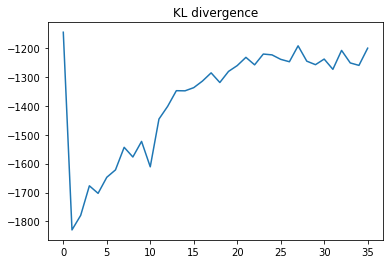

In [29]:
%matplotlib inline
y=optimizer.score_entropy
time=torch.arange(0,len(y),1.)
plt.title('KL divergence')
plt.plot(time, y)

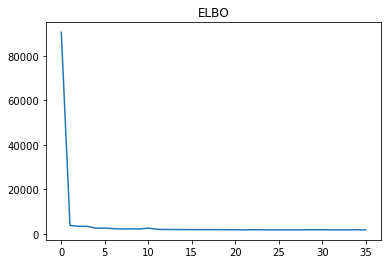

In [30]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('ELBO')
plt.plot(time, y)


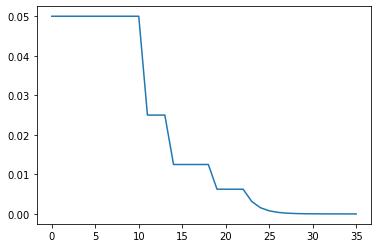

In [31]:
%matplotlib inline
y=optimizer.score_lr
time=torch.arange(0,len(y),1.)
plt.plot(time, y)


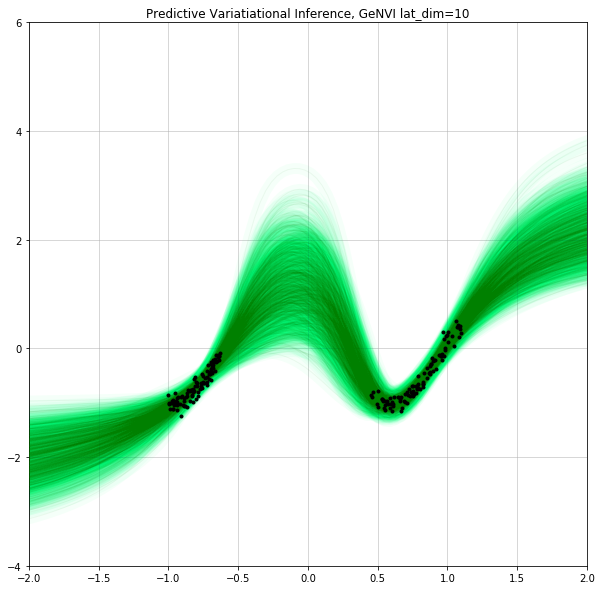

[tensor(1068.5360, device='cuda:0'),
 tensor(-924.5271, device='cuda:0'),
 tensor(-236.4646, device='cuda:0')]

In [7]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('Predictive Variatiational Inference, GeNVI lat_dim='+str(lat_dim))
    plt.show()
    return
    

show(GeN,1000)
scores

In [8]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'cpu')

In [9]:
print('nLPP_valid: '+str(nLPP_validation))
print('SE_valid: '+str(RSE_validation))
print('nLPP_test: '+str(nLPP_test))
print('SE_test: '+str(RSE_test))

nLPP_valid: (tensor(-0.7768), tensor(0.4444))
SE_valid: (tensor(0.0107), tensor(0.0154))
nLPP_test: (tensor(33.0666), tensor(63.2011))
SE_test: (tensor(1.5427), tensor(2.6888))


Pour un choix de points $x_0,...,x_{n-1}$, on définit:
$$
d(\theta,\theta')=\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert
$$
ou
$$
d_2(\theta,\theta')=\biggl(\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert^2\biggr)^{\frac{1}{2}}
$$


$P(f\in A)=P(\{\theta \mid f_\theta\in A\})$

$\theta \mapsto f_\theta$ (is it continuous?)

relation entre $d(\theta,\theta')$ et $d(f_\theta,f_\theta')$